In [1]:
import numpy as np
import pandas as pd 
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve

In [2]:
import os
img_X = []
label_y = []

#Image preprocessing step
# Define the path to the dataset
dataset_path = "/kaggle/input/fer2013/train/"

# Iterate over each subdirectory in the dataset path
for subdir in os.listdir(dataset_path):
    subdir_path = os.path.join(dataset_path, subdir)
    
    # Iterate over each image file in the subdirectory
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        
        # Extract the label from the parent directory name
        label = os.path.basename(subdir_path)
        
        # Do something with the label and file path
        #print("Label: {}, File path: {}".format(label, file_path))
        #append label and image to a list
        #img_X.append(img)
        label_y.append(label)
        
        
for root, dirname, filenames in os.walk('/kaggle/input/fer2013/train/'):
    for filename in filenames:
        if filename.endswith(".jpg"):
            #load image
            img = cv2.imread(os.path.join(root, filename), cv2.IMREAD_GRAYSCALE)
            
            #flatten image
            img = img.flatten()
            
            #append label and image to a list
            img_X.append(img)

#convert lists into numpy arrays
X = np.array(img_X)
y = np.array(label_y)

In [3]:
img_X_test = []
label_y_test = []

#Image preprocessing step
# Define the path to the dataset
dataset_path_test = "/kaggle/input/fer2013/test/"

# Iterate over each subdirectory in the dataset path
for subdir in os.listdir(dataset_path_test):
    subdir_path = os.path.join(dataset_path_test, subdir)
    
    # Iterate over each image file in the subdirectory
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        
        # Extract the label from the parent directory name
        label = os.path.basename(subdir_path)
        
        # Do something with the label and file path
        #print("Label: {}, File path: {}".format(label, file_path))
        #append label and image to a list
        #img_X.append(img)
        label_y_test.append(label)
        
        
for root, dirname, filenames in os.walk(dataset_path_test):
    for filename in filenames:
        if filename.endswith(".jpg"):
            #load image
            img = cv2.imread(os.path.join(root, filename), cv2.IMREAD_GRAYSCALE)
            
            #flatten image
            img = img.flatten()
            
            #append label and image to a list
            img_X_test.append(img)

#convert lists into numpy arrays
X_test_set = np.array(img_X_test)
y_test_set = np.array(label_y_test)

In [4]:
print(X)
print(X_test_set)

[[ 38  44  66 ...  16  26  33]
 [  9  17  67 ...  72  77  72]
 [254 255 255 ...   1   0   3]
 ...
 [106 106 109 ...   1   0   0]
 [  7   5   7 ...   7   8   9]
 [164 171 141 ... 202 187 177]]
[[ 54  54  54 ...  45  44  45]
 [199 199 199 ... 204 206 204]
 [255 253 255 ... 194 186 189]
 ...
 [222 227 226 ...  43  46  43]
 [255 255 255 ...  97  86  78]
 [254 255 252 ...  27   5  10]]


In [5]:
print(y)
print(y_test_set)

['surprise' 'surprise' 'surprise' ... 'happy' 'happy' 'happy']
['surprise' 'surprise' 'surprise' ... 'happy' 'happy' 'happy']


In [6]:
# Apply PCA to facial dataset
# Import the necessary libraries
from sklearn.decomposition import PCA

# Print the shape of the data
print(X.data.shape) #original shape of images   

pca = PCA(n_components=100)

# Fit the PCA model to the data
pca.fit(X.data)

# Transform the data to the new PCA space
X_pca_train = pca.transform(X.data)

# Print the shape of the transformed data
print(X_pca_train.shape)   #transformed and reduced

#the dimensionality has been reduced
#reduced dimensionality allows for vital facial features to be trained
print(X_pca_train)

(28709, 2304)
(28709, 100)
[[ 1106.14879017  2259.5812993   -297.10250891 ...    43.54449839
     16.60301676    36.15668816]
 [-2110.39875548   309.01888748  -157.00228182 ...  -200.96214818
     46.28267539   -42.86257845]
 [ 1413.84578866 -1474.15077963  -131.84300164 ...    31.05815096
   -125.98409694    11.18569669]
 ...
 [ 1843.67155188  -499.95938658 -2662.97255398 ...    30.62373479
    -23.00146007   -82.44501866]
 [ 3120.62321297  -332.43899101  -728.04537489 ...    37.72346522
    -12.67993349    57.34319502]
 [-1312.29328725   290.62038917 -1265.95629435 ...  -172.6497223
    -55.48373971  -100.22224871]]


In [7]:
# Apply PCA to facial dataset
# Print the shape of the data
print(X_test_set.data.shape) #original shape of images   

pca_test = PCA(n_components=100)

# Fit the PCA model to the data
pca_test.fit(X_test_set.data)

# Transform the data to the new PCA space
X_pca_test = pca.transform(X_test_set.data)

# Print the shape of the transformed data
print(X_pca_test.shape)   #transformed and reduced

#the dimensionality has been reduced
#reduced dimensionality allows for vital facial features to be trained
print(X_pca_test)

(7178, 2304)
(7178, 100)
[[ 1.86188401e+03  2.08670048e+02 -7.32542389e+02 ...  3.75955956e+01
   1.42597355e+02 -2.57238874e+01]
 [-1.09782165e+03 -1.45430099e+03 -4.61540809e+02 ... -6.79736901e+01
   7.60907253e+01 -1.67217338e+02]
 [-4.02667496e+03 -7.88175425e+02  6.11153231e+02 ... -1.07038071e+02
  -9.69034059e+01  6.44713152e+01]
 ...
 [-2.18097632e+03  1.53228588e+02 -1.50169438e+03 ...  3.10938116e+01
  -4.08438834e+00  2.00275895e+01]
 [-1.74834676e+03 -1.33660592e+03 -2.00545915e+03 ...  7.69089241e+01
   3.78115961e+01 -6.29939101e+01]
 [-1.24638843e+03  1.35665404e+03 -8.06910456e+02 ... -2.57725667e+00
   5.67260413e+01  1.46239667e+02]]


In [8]:
#run this block to train the SVM model with the polynomial classifier
svm_Model_Poly = SVC(kernel = 'poly', degree = 3, C=1, gamma = 'scale')
svm_Model_Poly.fit(X_pca_train, y)

SVC(C=1, kernel='poly')

In [9]:
#run this block to train the SVM model with the Radial basis classifier
svm_Model_RBF = SVC(kernel = 'rbf', C=1, gamma = 'scale')
svm_Model_RBF.fit(X_pca_train, y)

SVC(C=1)

In [10]:
#predict using polynomial classifier
y_pred_Poly = svm_Model_Poly.predict(X_pca_test)

In [11]:
print(y_pred_Poly)

['sad' 'surprise' 'happy' ... 'fear' 'sad' 'fear']


In [12]:
#predict using radial basis classifier
y_pred_RBF = svm_Model_RBF.predict(X_pca_test)

In [13]:
print(y_pred_RBF)

['surprise' 'surprise' 'surprise' ... 'fear' 'sad' 'fear']


In [14]:
#Metric calculations for Polynomial classifier
poly_Acc = accuracy_score(y_test_set, y_pred_Poly)
poly_Precision = precision_score(y_test_set, y_pred_Poly, average = 'weighted')
poly_Recall = recall_score(y_test_set, y_pred_Poly, average = 'weighted')
poly_F_Score = f1_score(y_test_set, y_pred_Poly, average= 'weighted')

print("Accuracy with polynomial Kernel function:", poly_Acc*100, '%')
print('Precision with polynomial Kernel function:', poly_Precision*100, '%')
print('Recall with polynomial Kernel function:', poly_Recall*100, '%')
print('F1 with polynomial Kernel function:', poly_F_Score*100, '%')

Accuracy with polynomial Kernel function: 38.96628587350237 %
Precision with polynomial Kernel function: 42.416064294651704 %
Recall with polynomial Kernel function: 38.96628587350237 %
F1 with polynomial Kernel function: 35.3657982886448 %


In [15]:
# Metric calculations for RBF classifier
rbf_Acc = accuracy_score(y_test_set, y_pred_RBF)
rbf_Precision = precision_score(y_test_set, y_pred_RBF, average = 'weighted')
rbf_Recall = recall_score(y_test_set, y_pred_RBF, average = 'weighted')
rbf_F_Score = f1_score(y_test_set, y_pred_RBF, average= 'weighted')

print("Accuracy with Radial basis kernel function:", rbf_Acc*100, '%')
print('Precision with Radial basis kernel function:', rbf_Precision*100, '%')
print('Recall with Radial basis kernel function:', rbf_Recall*100, '%')
print('F1 with Radial basis kernel function:', rbf_F_Score*100, '%')

Accuracy with Radial basis kernel function: 44.148787963220954 %
Precision with Radial basis kernel function: 44.15337983622625 %
Recall with Radial basis kernel function: 44.148787963220954 %
F1 with Radial basis kernel function: 42.241965712844184 %


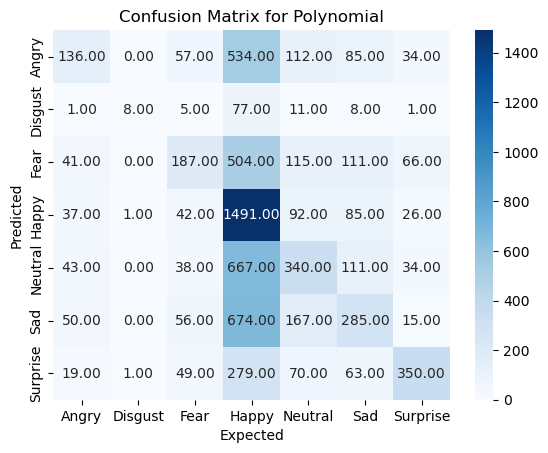

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm_Poly = confusion_matrix(y_test_set, y_pred_Poly)

categories = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Create heatmap plot of the confusion matrix
sns.heatmap(cm_Poly, annot=True, cmap='Blues', xticklabels=categories, yticklabels=categories, fmt='.2f')

# Set plot labels
plt.ylabel('Predicted')
plt.xlabel('Expected')
plt.title('Confusion Matrix for Polynomial')

# Show plot
plt.show()


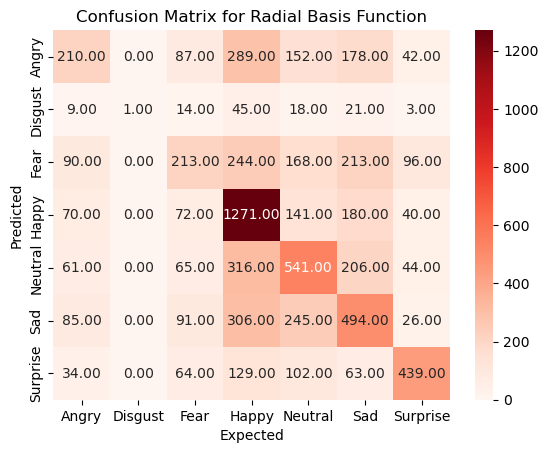

In [17]:
# Compute confusion matrix
cm_RBF = confusion_matrix(y_test_set, y_pred_RBF)

categories = ['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

# Create heatmap plot of the confusion matrix
sns.heatmap(cm_RBF, annot=True, cmap='Reds', xticklabels=categories, yticklabels=categories, fmt='.2f')

# Set plot labels
plt.ylabel('Predicted')
plt.xlabel('Expected')
plt.title('Confusion Matrix for Radial Basis Function')

# Show plot
plt.show()


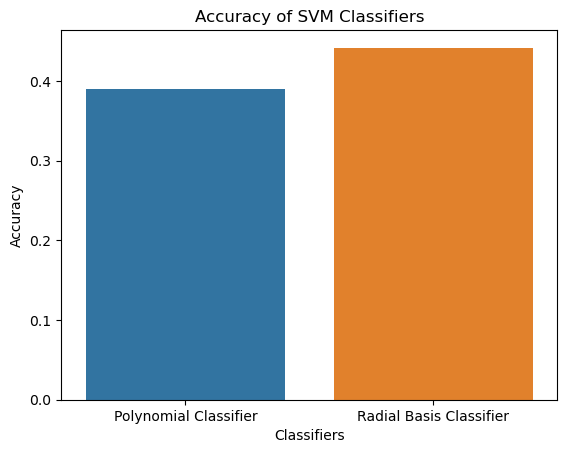

In [18]:
#plot accuracy of all classifiers
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

accuracies = [['Polynomial Classifier', poly_Acc], ['Radial Basis Classifier', rbf_Acc]]
df_Acc = pd.DataFrame(accuracies, columns = ['Classifiers', 'Accuracy'])

#create bar chart
sns.barplot(x="Classifiers", y="Accuracy", data = df_Acc)
plt.title("Accuracy of SVM Classifiers")
plt.show()

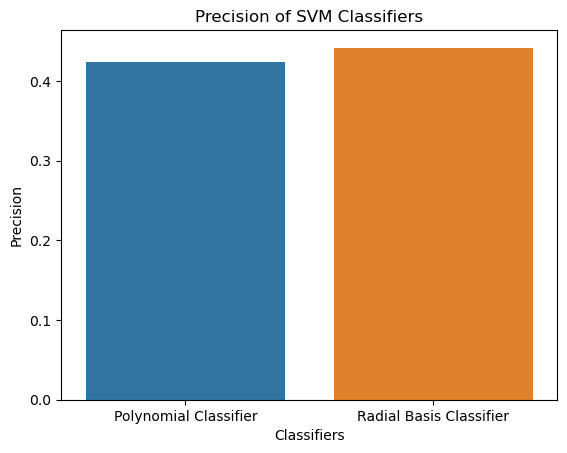

In [19]:
#plot precision of all classifiers
precision_vals = [['Polynomial Classifier', poly_Precision], ['Radial Basis Classifier', rbf_Precision]]
df_precision = pd.DataFrame(precision_vals, columns = ['Classifiers', 'Precision'])

#create bar chart
sns.barplot(x="Classifiers", y="Precision", data = df_precision)
plt.title("Precision of SVM Classifiers")
plt.show()

In [20]:
# Print the classification report
reportPoly = classification_report(y_test_set, y_pred_Poly)
print(reportPoly)

              precision    recall  f1-score   support

       angry       0.42      0.14      0.21       958
     disgust       0.80      0.07      0.13       111
        fear       0.43      0.18      0.26      1024
       happy       0.35      0.84      0.50      1774
     neutral       0.37      0.28      0.32      1233
         sad       0.38      0.23      0.29      1247
    surprise       0.67      0.42      0.52       831

    accuracy                           0.39      7178
   macro avg       0.49      0.31      0.32      7178
weighted avg       0.42      0.39      0.35      7178



In [21]:
# Print the classification report
reportRBF = classification_report(y_test_set, y_pred_RBF)
print(reportRBF)

              precision    recall  f1-score   support

       angry       0.38      0.22      0.28       958
     disgust       1.00      0.01      0.02       111
        fear       0.35      0.21      0.26      1024
       happy       0.49      0.72      0.58      1774
     neutral       0.40      0.44      0.42      1233
         sad       0.36      0.40      0.38      1247
    surprise       0.64      0.53      0.58       831

    accuracy                           0.44      7178
   macro avg       0.52      0.36      0.36      7178
weighted avg       0.44      0.44      0.42      7178

